In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

seed = 71351825
data = pd.read_csv('youtube_dislike_dataset.csv')

In [23]:
data.dtypes

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
tags             object
description      object
comments         object
dtype: object

In [24]:
data.head(10)

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...
5,--FmExEAsM8,IVE 'ELEVEN' MV,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,2021-12-01 09:00:03,36124750,965069,16618,59657,Kpop girl group 1theK Starshiptv starship MV...,IVE Twitter\n: https://twitter.com/IVEstarship...,omg !! they are so young and......pretty !!!! ...
6,--tbUe0JRc8,TEST COMPLET du Google Pixel 6 Pro : Une EXPRI...,UCGjKSSIpN7aYQluu04kPrsA,Brandon Le Proktor,2021-10-25 16:00:00,93337,5595,103,464,brandon le proktor google pixel 6 google pixel...,"Voici le Test du Google Pixel 6 Pro, le meille...",Salut les amis ! Encore une semaine folle en t...
7,-024Swollbc,We sold my bike for charity! Find out who got ...,UCOpP5PqrzODWpFU961acUbg,Berm Peak Express,2021-03-03 15:00:00,271736,16622,90,743,do it yourself diy tools home backyard mountai...,Today we actually send the P7 off to its new h...,Me: wait its not Friday\n\nSeth: pulled a snea...
8,-0PZSxZuAXQ,"The Breakfast Club Reacts to Kanye West's ""DON...",UChi08h4577eFsNXGd3sxYhw,Breakfast Club Power 105.1 FM,2021-08-06 12:10:25,535044,9207,384,1900,the breakfast club breakfast club power1051 ce...,Subscribe NOW to The Breakfast Club: http://ih...,No one can create excitement like Kanye. Not e...
9,-0QSEZIqVWc,How To Get *EVERY STAND* In AUT (A Universal T...,UCKB0Q6UkQ1US3-DSoOteU1g,VarietyJay,2021-08-31 04:46:35,598045,9431,318,2208,a universal time sans a universal time roblox ...,This is how to get a Stand in A Universal Time...,Are you guys enjoying the new AUT release?\nSa...


In [25]:
#isolate numerical values
data_num = data.select_dtypes("int64")
data_num.dtypes

view_count       int64
likes            int64
dislikes         int64
comment_count    int64
dtype: object

In [37]:
dfnew = data_num.loc[:, ['view_count', 'dislikes']]

In [38]:
dfnew.head()

,view_count,dislikes
0,1048888,226
1,15352638,7479
2,925281,401
3,2641597,441
4,715724,367


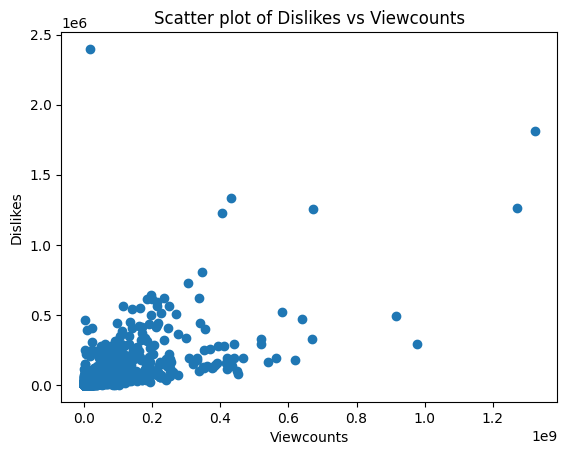

In [39]:
plt.scatter(dfnew['view_count'], dfnew['dislikes'])
plt.xlabel('Viewcounts')
plt.ylabel('Dislikes')
plt.title('Scatter plot of Dislikes vs Viewcounts')
plt.show()

In [5]:
data_num.corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.784229,0.684469,0.464392
likes,0.784229,1.000000,0.679817,0.580953
dislikes,0.684469,0.679817,1.000000,0.391739
comment_count,0.464392,0.580953,0.391739,1.000000


As expected view count has a high correlation with dislikes. More views = likely leads to more dislikes. Let us attempt linear regression.

In [6]:
def regression(variable,train):
    model = LinearRegression()
    model.fit(train[variable], train['dislikes'])
    plt.scatter(train[variable], train['dislikes'])
    plt.plot(train[variable], model.predict(train[variable]), color='red')
    plt.show()
    return model
def stats(model,variable,test):
    prediction = model.predict(test[variable])
    mean_square_error = mean_squared_error(test[variable], prediction)
    root_mean_square_error = mean_squared_error(test[variable], prediction, squared=False)
    r_square = model.score(test[variable], test['dislikes'])

    print("Mean Square Error(accuracy of the model):", mean_square_error)
    print("Root Mean Square Error:", root_mean_square_error)
    print("R square:", r_square)
def predict(model,variable,data):
    new_data = data.copy()
    new_data["Predicted_Dislikes"] = model.predict(data[variable])
    new_data['difference(%)'] = ((new_data['Predicted_Dislikes']/new_data['dislikes'])-1)*100
    return new_data

In [7]:
train = data_num.sample(frac = 0.8,random_state = seed)
test = data_num.drop(train.index)

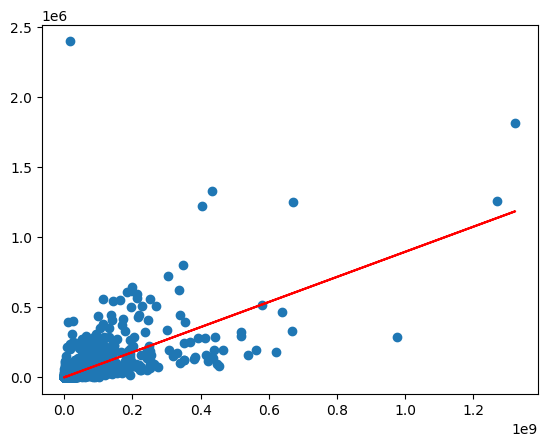

Mean Square Error(accuracy of the model): 472093225213422.94
Root Mean Square Error: 21727706.395600595
R square: 0.4589827863992325


In [8]:
#regression on view_count and dislikes.
model = regression(['view_count'],train)
stats(model,['view_count'],test)

In [9]:
predict(model,['view_count'],test).head(10)

,view_count,likes,dislikes,comment_count,Predicted_Dislikes,difference(%)
7,271736,16622,90,743,216.012466,140.013852
15,3080415,132904,4445,4943,2731.526200,-38.548342
19,3209398,169047,1500,3669,2847.046168,89.803078
30,1226989,43212,889,1874,1071.557739,20.535179
33,2169614,243671,2650,3596,1915.793101,-27.705921
38,1398663,61780,1295,4030,1225.312691,-5.381259
41,889913,25372,442,891,769.665174,74.132392
50,2310454,41694,301,2831,2041.932455,578.382875
52,1827691,33764,435,887,1609.559458,270.013669
56,18853006,437526,15883,26095,16857.800249,6.137381


As can be seen, the strong correlation of view to dislike is just due to the fact that videos that have more views tend to have more interactions.

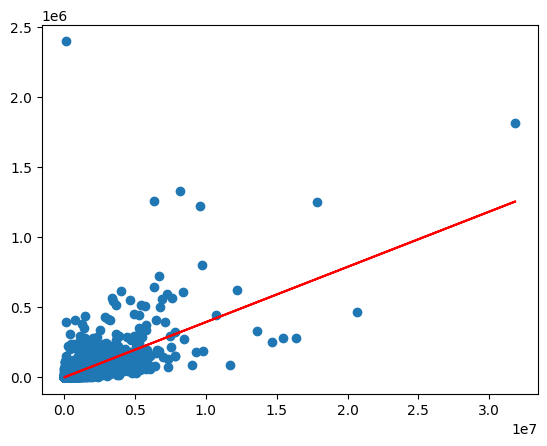

Mean Square Error(accuracy of the model): 190348247059.9628
Root Mean Square Error: 436289.17825218034
R square: 0.4897515477071841


In [10]:
#how about likes to dislikes
model1 = regression(['likes'],train)
stats(model1,['likes'],test)

In [11]:
predict(model1,['likes'],test).head(10)

,view_count,likes,dislikes,comment_count,Predicted_Dislikes,difference(%)
7,271736,16622,90,743,-878.504755,-1076.116395
15,3080415,132904,4445,4943,3706.122578,-16.622664
19,3209398,169047,1500,3669,5131.125465,242.075031
30,1226989,43212,889,1874,169.853897,-80.893825
33,2169614,243671,2650,3596,8073.311102,204.653249
38,1398663,61780,1295,4030,901.930747,-30.352838
41,889913,25372,442,891,-533.520242,-220.705937
50,2310454,41694,301,2831,110.004012,-63.453817
52,1827691,33764,435,887,-202.650524,-146.586327
56,18853006,437526,15883,26095,15716.393709,-1.048960


Similarly for the likes a general linear model is not a good predictor as you would think that more likes = less dislikes.

In [12]:
#how about we factor out the view counts by dividing both likes and dislikes by view count and attempt to predict dislikes that way.
num_factored = data_num.copy()
num_factored['likes'] = num_factored['likes']/num_factored['view_count']
num_factored['dislikes'] = num_factored['dislikes']/num_factored['view_count']
num_factored.head(10)

,view_count,likes,dislikes,comment_count
0,1048888,0.018605,0.000215,1319
1,15352638,0.023402,0.000487,18729
2,925281,0.012117,0.000433,831
3,2641597,0.014813,0.000167,3745
4,715724,0.045949,0.000513,1067
5,36124750,0.026715,0.000460,59657
6,93337,0.059944,0.001104,464
7,271736,0.061170,0.000331,743
8,535044,0.017208,0.000718,1900
9,598045,0.015770,0.000532,2208


In [13]:
num_factored.corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,-0.075025,-0.006694,0.464392
likes,-0.075025,1.000000,0.046415,0.015435
dislikes,-0.006694,0.046415,1.000000,0.009293
comment_count,0.464392,0.015435,0.009293,1.000000


In [14]:
#As can be seen even when factored there is low correlation between likes and dislikes. Let us try to calculate some like to dislike ratios and do some visualization.
data_num_channel_ratio = data_num.copy()
data_num_channel_ratio = data_num_channel_ratio.join(data['channel_title'])
data_num_channel_ratio['like_dislike_ratio'] = data_num_channel_ratio['likes']/data_num_channel_ratio['dislikes']
data_num_channel_ratio['view_dislike_ratio'] = data_num_channel_ratio['view_count']/data_num_channel_ratio['dislikes']
#top 5 channel with the most videos in dataset
data_num_channel_ratio['channel_title'].value_counts().head(5)

channel_title
Sky Sports Football    533
The United Stand       301
BT Sport               246
NBA                    209
NFL                    162
Name: count, dtype: int64

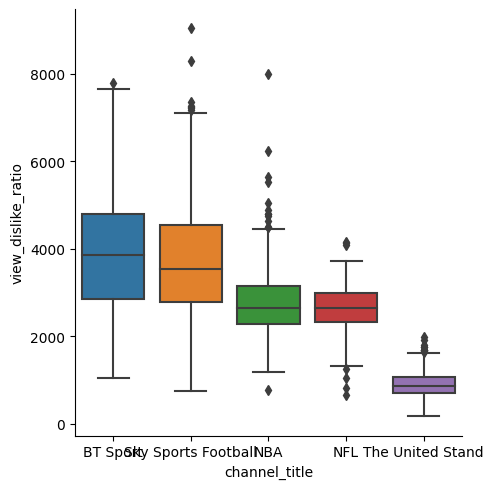

In [15]:
top5_channels = data_num_channel_ratio[data_num_channel_ratio['channel_title'].isin(['Sky Sports Football','The United Stand','BT Sport','NBA','NFL'])]
sb.catplot(data=top5_channels, x="channel_title", y="view_dislike_ratio", kind="box")
plt.show()

The plots are relatively seperate meaning there is distinction between channel and view dislike ratio.

In [16]:
skysports = data_num_channel_ratio[data_num_channel_ratio['channel_title'].isin(['Sky Sports Football'])]
united = data_num_channel_ratio[data_num_channel_ratio['channel_title'].isin(['The United Stand'])]
btsport = data_num_channel_ratio[data_num_channel_ratio['channel_title'].isin(['BT Sport'])]

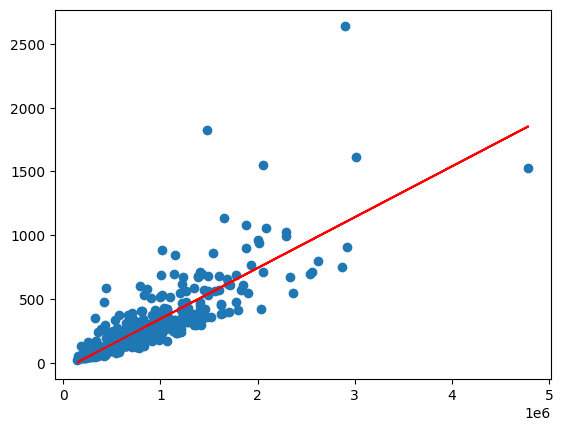

Mean Square Error(accuracy of the model): 1122515393509.219
Root Mean Square Error: 1059488.2696421037
R square: 0.6930784168427488


In [17]:
#regression on view_count and dislikes.
train_sky = skysports.sample(frac = 0.8,random_state = seed)
test_sky = skysports.drop(train_sky.index)
model_sky = regression(['view_count'],train_sky)
stats(model_sky,['view_count'],test_sky)

In [18]:
predict(model_sky,['view_count'],test_sky).head(10)

,view_count,likes,dislikes,comment_count,channel_title,like_dislike_ratio,view_dislike_ratio,Predicted_Dislikes,difference(%)
1048,352320,4206,62,343,Sky Sports Football,67.838710,5682.580645,84.643329,36.521498
1380,620155,7472,169,1400,Sky Sports Football,44.213018,3669.556213,191.505436,13.316826
1780,193194,4691,93,500,Sky Sports Football,50.440860,2077.354839,21.154465,-77.253263
2318,763731,10376,252,629,Sky Sports Football,41.174603,3030.678571,248.790086,-1.273776
2393,467279,7138,101,837,Sky Sports Football,70.673267,4626.524752,130.510228,29.218048
2677,935359,12340,259,1107,Sky Sports Football,47.644788,3611.424710,317.267058,22.496933
3020,1121015,18751,298,2285,Sky Sports Football,62.922819,3761.795302,391.340989,31.322480
3310,1200498,19319,527,2578,Sky Sports Football,36.658444,2277.984820,423.053502,-19.724193
3497,1322190,23065,274,2612,Sky Sports Football,84.178832,4825.510949,471.606767,72.119258
4139,560201,9034,183,1292,Sky Sports Football,49.366120,3061.207650,167.584699,-8.423662


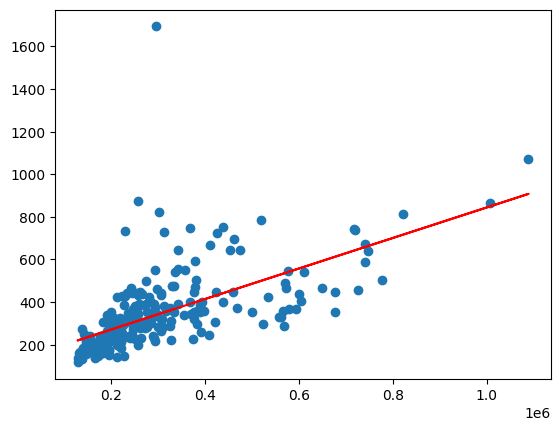

Mean Square Error(accuracy of the model): 152387530380.08014
Root Mean Square Error: 390368.45464263647
R square: 0.390649255794556


In [19]:
#regression on view_count and dislikes.
train_united = united.sample(frac = 0.8,random_state = seed)
test_united = united.drop(train_united.index)
model_united = regression(['view_count'],train_united)
stats(model_united,['view_count'],test_united)

In [20]:
predict(model_united,['view_count'],test_united).head(10)

,view_count,likes,dislikes,comment_count,channel_title,like_dislike_ratio,view_dislike_ratio,Predicted_Dislikes,difference(%)
2564,121752,3997,173,434,The United Stand,23.104046,703.768786,215.035435,24.297939
2665,168991,5328,125,413,The United Stand,42.624000,1351.928000,248.871453,99.097162
2797,979885,15958,738,483,The United Stand,21.623306,1327.757453,829.692893,12.424511
4242,636831,12198,420,199,The United Stand,29.042857,1516.264286,583.972591,39.041093
4313,375481,17683,401,723,The United Stand,44.097257,936.361596,396.774655,-1.053702
5250,362658,8458,262,312,The United Stand,32.282443,1384.190840,387.589887,47.935071
5861,251828,7324,375,662,The United Stand,19.530667,671.541333,308.205356,-17.811905
6758,810953,15857,481,276,The United Stand,32.966736,1685.972973,708.691470,47.337104
7811,255837,7481,468,1101,The United Stand,15.985043,546.660256,311.076894,-33.530578
8512,452888,11238,784,1265,The United Stand,14.334184,577.663265,452.219196,-42.318980


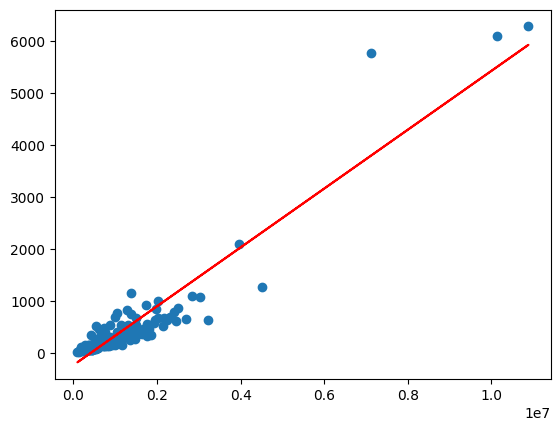

Mean Square Error(accuracy of the model): 2100294270081.3535
Root Mean Square Error: 1449239.203886423
R square: 0.4599389003694737


In [21]:
#regression on view_count and dislikes.
train_bt = btsport.sample(frac = 0.8,random_state = seed)
test_bt = btsport.drop(train_bt.index)
model_bt = regression(['view_count'],train_bt)
stats(model_bt,['view_count'],test_bt)

In [22]:
predict(model_bt,['view_count'],test_bt).head(10)

,view_count,likes,dislikes,comment_count,channel_title,like_dislike_ratio,view_dislike_ratio,Predicted_Dislikes,difference(%)
817,748169,9953,113,802,BT Sport,88.079646,6620.964602,192.093016,69.993819
1654,1143110,18450,223,1504,BT Sport,82.735426,5126.053812,415.436554,86.294419
2723,1750293,15435,453,1117,BT Sport,34.072848,3863.781457,758.805309,67.506691
3042,1294237,14044,339,2148,BT Sport,41.427729,3817.808260,500.900557,47.758276
3246,2671520,36408,622,3012,BT Sport,58.533762,4295.048232,1279.769447,105.750715
4448,475931,8085,123,918,BT Sport,65.731707,3869.357724,38.139392,-68.992364
4505,438850,5114,88,464,BT Sport,58.113636,4986.931818,17.169673,-80.489008
5396,2051781,38474,764,4567,BT Sport,50.358639,2685.577225,929.300134,21.636143
5938,1227332,14185,303,970,BT Sport,46.815182,4050.600660,463.065034,52.826744
6846,224815,2994,50,343,BT Sport,59.880000,4496.300000,-103.869505,-307.739011


Splitting in to individual channels does seem to help a little but we are still have very large variance and negative predicted dislikes. Due to the nature of youtube dislikes a simple linear model can only predict relatively acculately if the video gets average dislikes for the number of views.